# Gestion des recommandations

## Recuperation des données

In [22]:
import json
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import random

# Load the data
dir1 = "images"
dir2 = "ExifDatatest2.json"
dir = os.path.join(dir1, dir2)

data = pd.read_json(dir)
data['result'] = random.choices(["Yes", "No"], k=len(data))
print(data.head())
print(data.tail())

       theme                    image  width  height format orientation  \
0  Exoplanet          55_Cancri_b.jpg   1024     768    PNG     no exif   
1  Exoplanet         Gliese_876_e.jpg   1587     919    PNG     no exif   
2  Exoplanet                XO-3b.jpg    800     500   JPEG     no exif   
3  Exoplanet  OGLE-2005-BLG-169Lb.jpg   1271     746   JPEG     no exif   
4  Exoplanet          Kepler-242b.jpg   1980    1200   JPEG     no exif   

    color_0   color_1    color_2   color_3    color_4   red  green  blue  \
0     black  darkgrey   darkgrey     black      black  0.15   0.15  0.15   
1  darkgrey     black   darkgrey     black       grey  0.15   0.15  0.15   
2     black       red  lightgrey     brown   darkgrey  0.15   0.15  0.15   
3     black  darkgrey       grey  darkgrey       grey  0.15   0.15  0.15   
4     brown     black      white  darkgrey  lightgrey  0.15   0.15  0.15   

  result  
0     No  
1     No  
2    Yes  
3     No  
4    Yes  
        theme             

## Labelisation des données

In [23]:
# on enleve les colonnes inutiles
data.drop('orientation', axis=1, inplace=True)
data.drop('image', axis=1, inplace=True)
data.tail()

theme  width  height format   color_0    color_1    color_2  \
713  Voitures   5408    3472   JPEG  darkgrey       grey       grey   
714  Voitures   1087     697   JPEG  darkgrey  lightgrey   darkgrey   
715  Voitures   4524    3385   JPEG     black       grey  lightgrey   
716  Voitures   2975    2000   JPEG  darkgrey  lightgrey       grey   
717  Voitures   4032    3024   JPEG      grey   darkgrey       grey   

       color_3    color_4  red  green  blue result  
713   darkgrey  lightgrey  0.5    0.5   0.5     No  
714      black       grey  0.5    0.5   0.5     No  
715   darkgrey  lightgrey  0.5    0.5   0.5    Yes  
716      white      black  0.5    0.5   0.5     No  
717  lightgrey      white  0.5    0.5   0.5    Yes

In [24]:
# label encoder
themeLabel = LabelEncoder()
data['theme'] = themeLabel.fit_transform(data['theme'])
widthLabel = LabelEncoder()
data['width'] = widthLabel.fit_transform(data['width'])
heightLabel = LabelEncoder()
data['height'] = heightLabel.fit_transform(data['height'])
formatLabel = LabelEncoder()
data['format'] = formatLabel.fit_transform(data['format'])
color_0Label = LabelEncoder()
data['color_0'] = color_0Label.fit_transform(data['color_0'])
color_1Label = LabelEncoder()
data['color_1'] = color_1Label.fit_transform(data['color_1'])
color_2Label = LabelEncoder()
data['color_2'] = color_2Label.fit_transform(data['color_2'])
color_3Label = LabelEncoder()
data['color_3'] = color_3Label.fit_transform(data['color_3'])
color_4Label = LabelEncoder()
data['color_4'] = color_4Label.fit_transform(data['color_4'])
redLabel = LabelEncoder()
data['red'] = redLabel.fit_transform(data['red'])
greenLabel = LabelEncoder()
data['green'] = greenLabel.fit_transform(data['green'])
blueLabel = LabelEncoder()
data['blue'] = blueLabel.fit_transform(data['blue'])
resultLabel = LabelEncoder()
data['result'] = resultLabel.fit_transform(data['result'])

data.tail()


theme  width  height  format  color_0  color_1  color_2  color_3  \
713      3    159     186       0        4        5        5        3   
714      3     60      66       0        4        7        3        0   
715      3    147     184       0        0        5        7        3   
716      3    115     136       0        4        7        5        9   
717      3    137     176       0        6        3        5        7   

     color_4  red  green  blue  result  
713        7    1      1     1       0  
714        6    1      1     1       0  
715        7    1      1     1       1  
716        0    1      1     1       0  
717        9    1      1     1       1

## Utilisation d'un arbre de décision

In [25]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
pourcent = 0.95
data_tc = data.drop('result', axis=1).iloc[0:int(len(data)*pourcent)]
data_result = data['result'].iloc[0:int(len(data)*pourcent)]
dtc = dtc.fit(data_tc , data_result)
data_result.iloc[0:5]

0    0
1    0
2    1
3    0
4    1
Name: result, dtype: int64

## On affiche l'arbre de decision

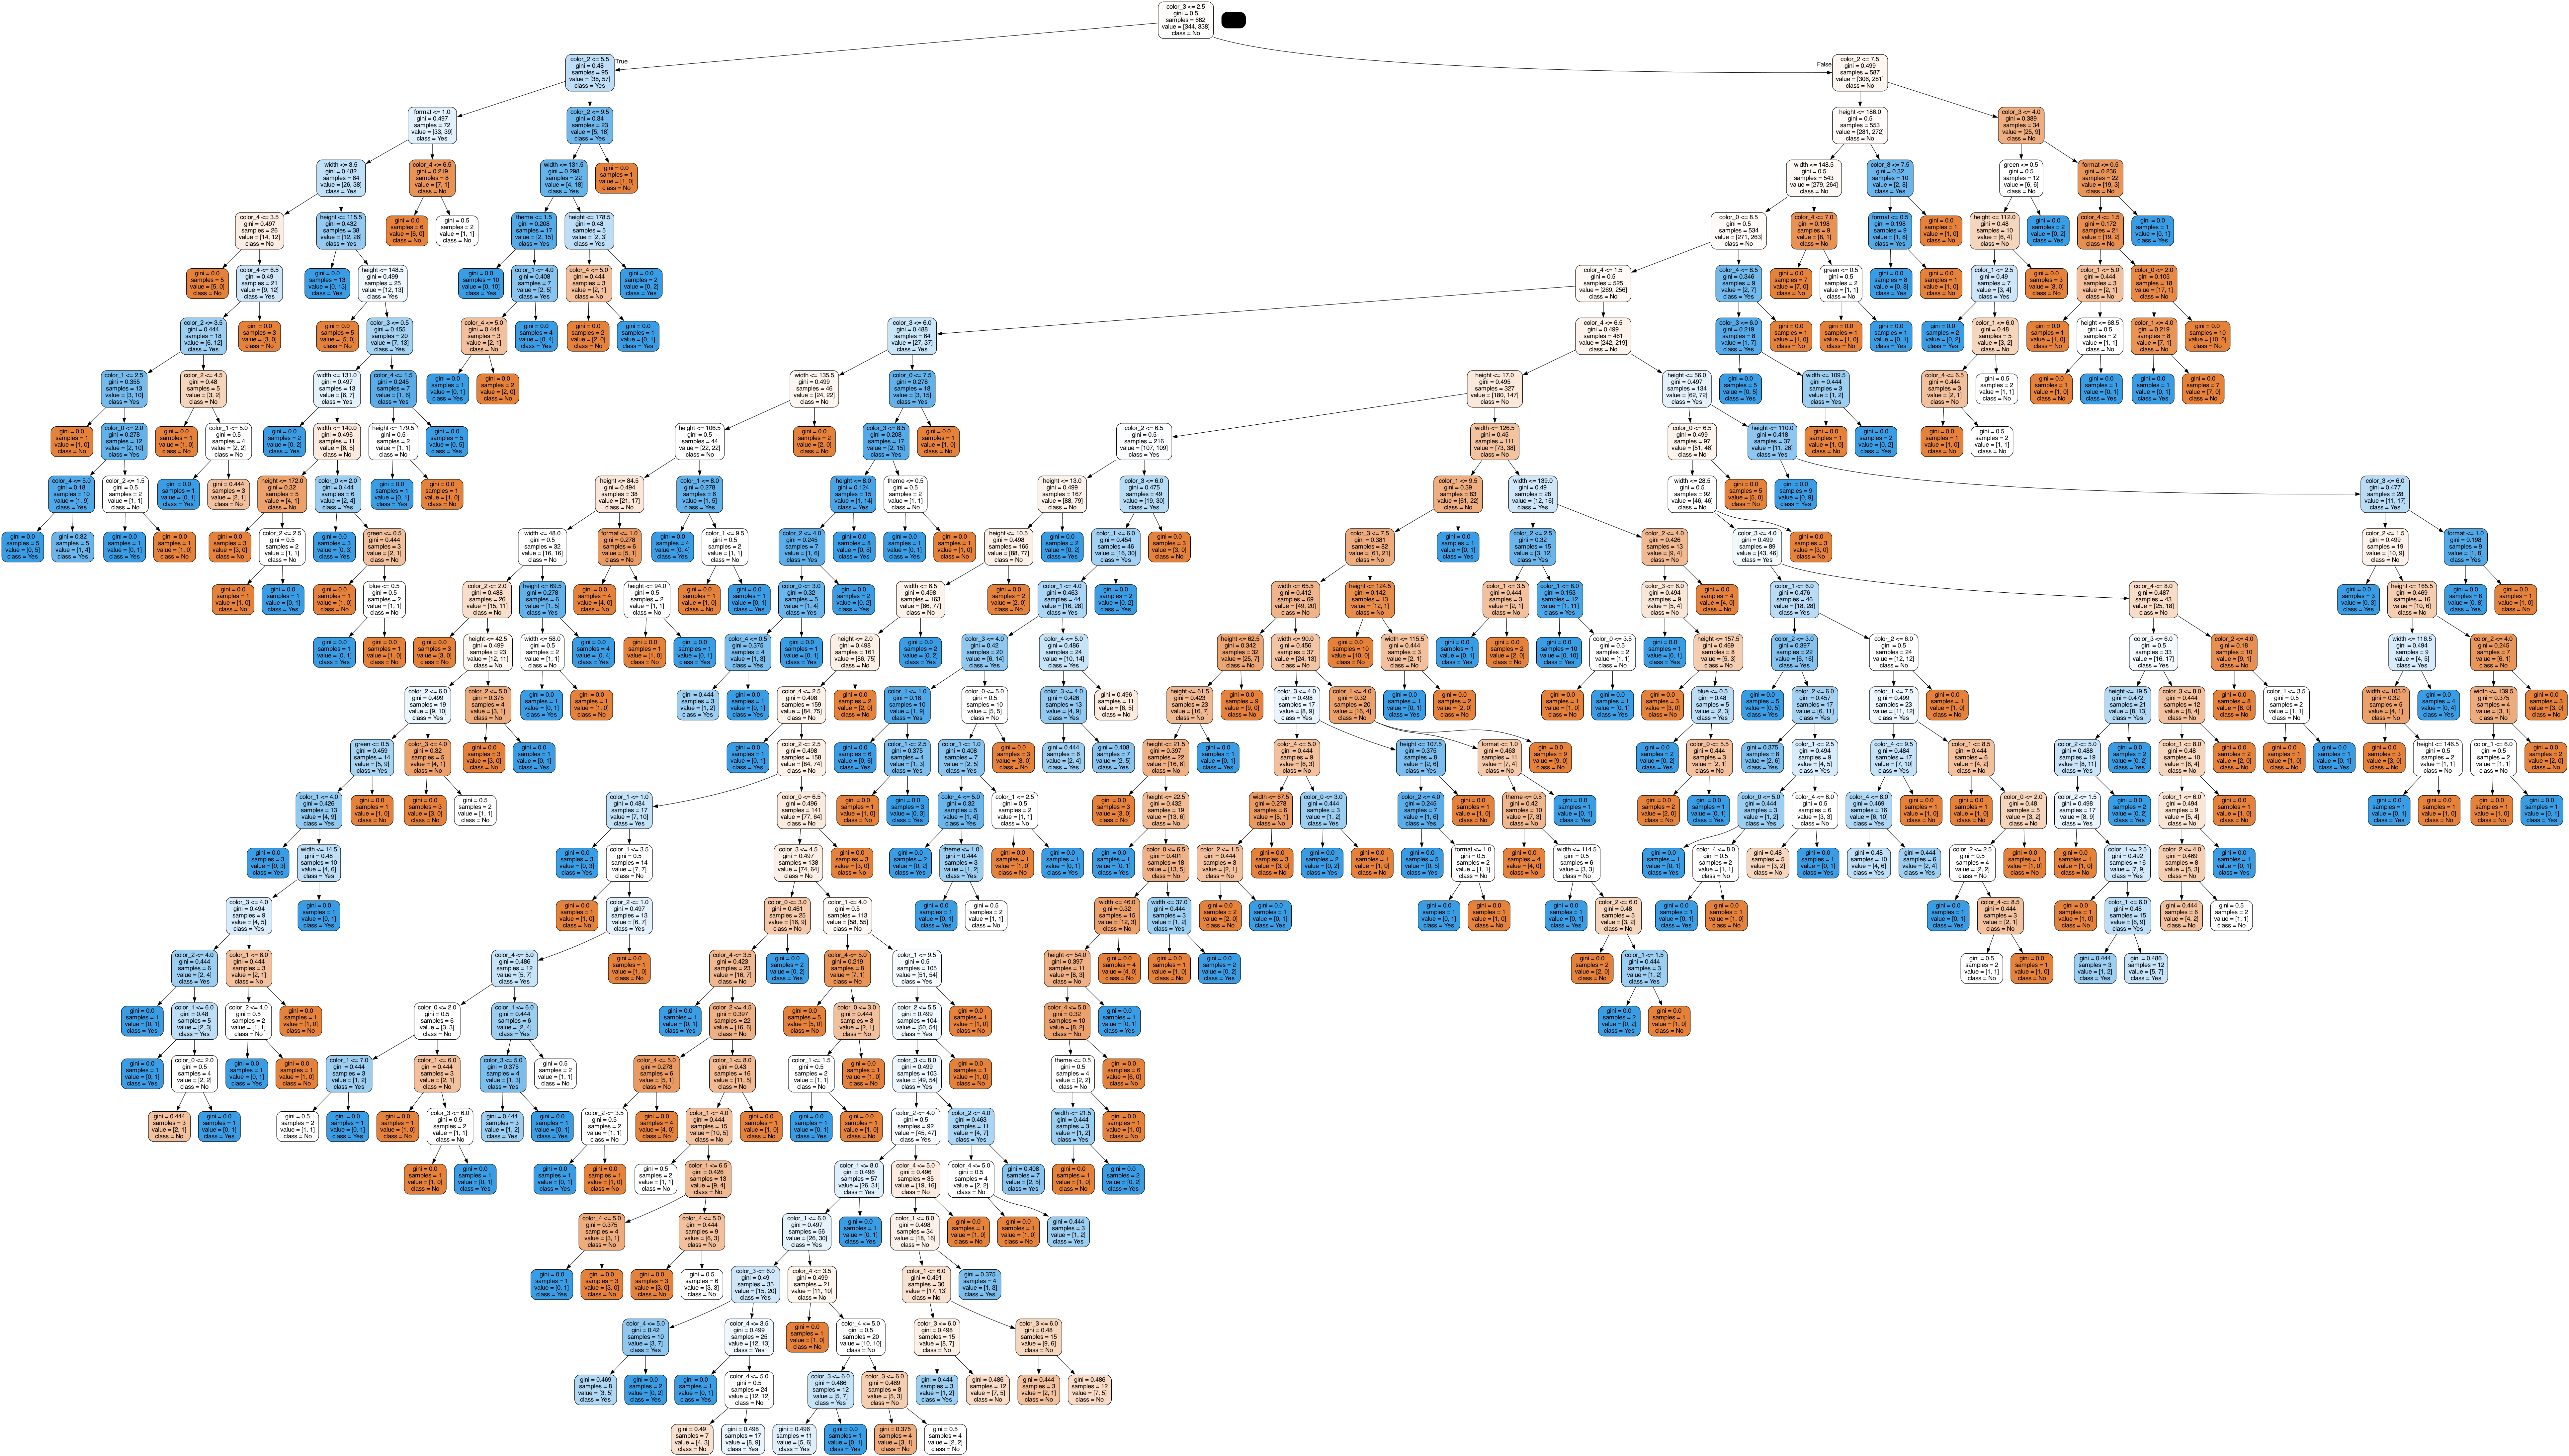

In [26]:

import graphviz
import pydotplus
from IPython.display import Image, display

dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=data_tc.columns,
        filled=True, rounded=True, 
        class_names =
        resultLabel.inverse_transform(
        pd.DataFrame(data_result).result.unique())
        )
graph = graphviz.Source(dot_data) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)
#pydot_graph.write_png('tree.png')


## Prediction



In [27]:
# avec la derniere image des voitures
prediction = dtc.predict(
    [[
        themeLabel.transform(["Pokemon2"])[0],
        widthLabel.transform(["7786"])[0],
        heightLabel.transform(["4380"])[0],
        formatLabel.transform(["JPEG"])[0],
        color_0Label.transform(["red"])[0],
        color_1Label.transform(["grey"])[0],
        color_2Label.transform(["blue"])[0],
        color_3Label.transform(["darkgrey"])[0],
        color_4Label.transform(["lightgrey"])[0],
        redLabel.transform([0.5])[0],
        greenLabel.transform([0.15])[0],
        blueLabel.transform([0.5])[0]
    ]]
)
print(resultLabel.inverse_transform(prediction))
print(dtc.feature_importances_)

['Yes']
[0.0159527  0.14047897 0.17277867 0.04449679 0.08011296 0.13865226
 0.13694315 0.11704093 0.1309258  0.         0.01410366 0.00851411]


/usr/local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
